<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-и-подготовка-данных" data-toc-modified-id="Изучение-и-подготовка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Статистический-анализ" data-toc-modified-id="Статистический-анализ-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Статистический анализ</a></span></li><li><span><a href="#Изучение-корреляции" data-toc-modified-id="Изучение-корреляции-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Изучение корреляции</a></span><ul class="toc-item"><li><span><a href="#Итог" data-toc-modified-id="Итог-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Итог</a></span></li></ul></li><li><span><a href="#Разбиваем-данные-на-выборки" data-toc-modified-id="Разбиваем-данные-на-выборки-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Разбиваем данные на выборки</a></span></li></ul></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Обучений-модели" data-toc-modified-id="Обучений-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучений модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-этапу-подготовки-расчёта-прибыли" data-toc-modified-id="Выводы-по-этапу-подготовки-расчёта-прибыли-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы по этапу подготовки расчёта прибыли</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Расчет-прибыли-и-рисков-с-помощью-функции." data-toc-modified-id="Расчет-прибыли-и-рисков-с-помощью-функции.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Расчет прибыли и рисков с помощью функции.</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Цели проекта 

Цель проекта - построить модель машинного обучения для определения наиболее прибыльного региона для бурения новых нефтяных скважин.

Для этого необходимо:

* Загрузить и изучить данные по 3 регионам
* Построить модель регрессии для оценки объема запасов в каждом регионе
* Выбрать лучшие скважины в каждом регионе по предсказаниям модели
* Рассчитать потенциальную прибыль и риски для каждого региона
* Выбрать оптимальный регион с учетом прибыли и рисков

Содержание

## Подготовка данных

### Импорт библиотек

In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

### Загрузка данных

In [432]:
data_region_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_region_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_region_2 = pd.read_csv('/datasets/geo_data_2.csv')


### Изучение и подготовка данных

Датасеты для регионов содержит 100000 строк и 5 столбцов каждый. Из условий задания мы знаем что данные синтетические.
Каждая строка соответствует одной скважине в регионе. Столбцы имеют следующие названия и типы данных:

* id — уникальный идентификатор скважины, тип данных object (строка)
* Идентификационные признаки не несут полезной информации для модели и могут быть удалены из данных для исследований.
* f0, f1, f2 — три признака точек, тип данных float64 (вещественное число)
* product — объём запасов в скважине (тыс. баррелей), тип данных float64 (вещественное число)

Все столбцы, кроме id, являются числовыми и не имеют пропущенных значений или дубликатов.

In [433]:
# Список идентификационных столбцов
id_columns = ['id']

# Удаляем идентификационные столбцы
data_region_0 = data_region_0.drop(id_columns, axis=1)
data_region_1 = data_region_1.drop(id_columns, axis=1)
data_region_2 = data_region_2.drop(id_columns, axis=1)

In [434]:
print('Дубликаты',data_region_0.duplicated().sum())
print(data_region_0)
data_region_0.info()


Дубликаты 0
             f0        f1        f2     product
0      0.705745 -0.497823  1.221170  105.280062
1      1.334711 -0.340164  4.365080   73.037750
2      1.022732  0.151990  1.419926   85.265647
3     -0.032172  0.139033  2.978566  168.620776
4      1.988431  0.155413  4.751769  154.036647
...         ...       ...       ...         ...
99995  0.971957  0.370953  6.075346  110.744026
99996  1.392429 -0.382606  1.273912  122.346843
99997  1.029585  0.018787 -1.348308   64.375443
99998  0.998163 -0.528582  1.583869   74.040764
99999  1.764754 -0.266417  5.722849  149.633246

[100000 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [435]:
print('Дубликаты',data_region_1.duplicated().sum())
print(data_region_1)
data_region_1.info()

Дубликаты 0
              f0         f1        f2     product
0     -15.001348  -8.276000 -0.005876    3.179103
1      14.272088  -3.475083  0.999183   26.953261
2       6.263187  -5.948386  5.001160  134.766305
3     -13.081196 -11.506057  4.999415  137.945408
4      12.702195  -8.147433  5.004363  134.766305
...          ...        ...       ...         ...
99995   9.535637  -6.878139  1.998296   53.906522
99996 -10.160631 -12.558096  5.005581  137.945408
99997  -7.378891  -3.084104  4.998651  137.945408
99998   0.665714  -6.152593  1.000146   30.132364
99999  -3.426139  -7.794274 -0.003299    3.179103

[100000 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)

In [436]:
print('Дубликаты',data_region_2.duplicated().sum())
print(data_region_2)
data_region_2.info()


Дубликаты 0
             f0        f1        f2     product
0     -1.146987  0.963328 -0.828965   27.758673
1      0.262778  0.269839 -2.530187   56.069697
2      0.194587  0.289035 -5.586433   62.871910
3      2.236060 -0.553760  0.930038  114.572842
4     -0.515993  1.716266  5.899011  149.600746
...         ...       ...       ...         ...
99995 -1.777037  1.125220  6.263374  172.327046
99996 -1.261523 -0.894828  2.524545  138.748846
99997 -1.199934 -2.957637  5.219411  157.080080
99998 -2.419896  2.417221 -5.548444   51.795253
99999 -2.551421 -2.025625  6.090891  102.775767

[100000 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


#### Статистический анализ

По результатам статистического анализа датасетов для трёх регионов можно сделать следующие выводы:

* Средний объём запасов в скважине (product) варьируется от 68.825 тыс. баррелей в регионе 1 до 95 тыс. баррелей в регионе 2. Регион 0 имеет средний объём запасов 92.5 тыс. баррелей, что близко к региону 2.
* Стандартное отклонение объёма запасов в скважине (product) также различается в разных регионах. Регион 1 имеет наименьшее стандартное отклонение 45.944, что означает, что данные более сгруппированы вокруг среднего значения. Регион 2 имеет наибольшее стандартное отклонение 44.749, что означает, что данные более разбросаны и имеют больший размах.
* Регион 0 имеет самый большой максимальный объём запасов 185.364 тыс. баррелей, а регион 1 имеет самый маленький максимальный объём запасов 137.945 тыс. баррелей. 

Регион 2 и 0 имеею точки добвчи с объём запасов 0 тыс. баррелей. Нулевой запас объёмов может означать две вещи:

* В этой точке не было запасов при бурении, то есть скважина оказалась сухой. Это может быть связано с ошибками в геологической разведке или неблагоприятными природными условиями.
* В этой точке были запасы при бурении, но они были недостаточно большими для того, чтобы считаться экономически выгодными. Это может быть связано с высокими затратами на разработку скважины или низким качеством нефти.

In [437]:
print(data_region_0.describe())
print(data_region_1.describe())
print(data_region_2.describe())


                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%       

Рассмотрим гистограмму распределения целевого признака по трем регионам. В то время как у региона 0 и 2 распредление нормально - регион 1 имеет равномерное распредление при всех значениях, с пиками в начале и конце.

<AxesSubplot:>

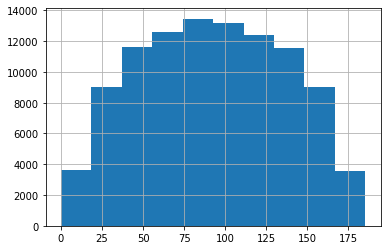

In [438]:
data_region_0['product'].hist()

<AxesSubplot:>

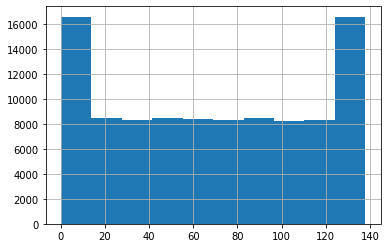

In [439]:
data_region_1['product'].hist()

In [440]:
data_region_1['product'].value_counts()

53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64

<AxesSubplot:>

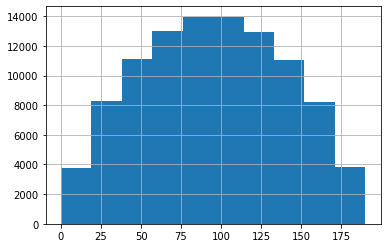

In [441]:
data_region_2['product'].hist()

#### Изучение корреляции

У всех трех регионов наблюдается высокая положительная корреляция между признаком f2 и целевым признаком product. Это говорит о том, что эти признаки имеют сильную линейную связь и частично определяют друг друга.

Особенно высокий уровень корреляции 0.999 в регионе 1 указывает на то, что зная значение f2, мы можем muito точно предсказать значение product. Хотя такая ситуация благоприятна для построения точной линейной модели, стоит уделить внимание возможным проблемам:

* Риск переобучения модели на данных региона 1 из-за слишком тесной зависимости между признаками
* Вероятная нестабильность модели при небольших изменениях в данных
* Снижение интерпретируемости влияния отдельных признаков на целевой

Для регионов 0 и 2 корреляция ниже (0.48 и 0.45), но тоже довольно высока. Это говорит об умеренной положительной связи между f2 и product.


<AxesSubplot:>

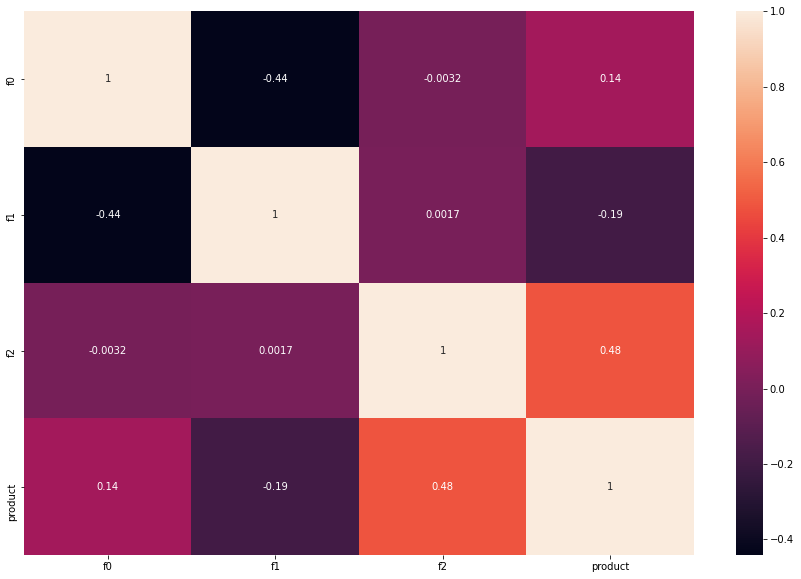

In [442]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data_region_0.corr(), annot=True)


<AxesSubplot:>

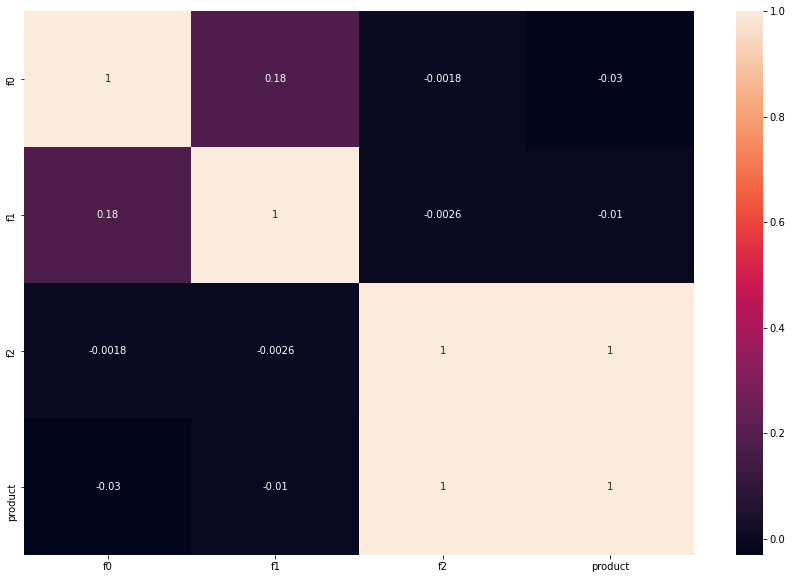

In [443]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data_region_1.corr(), annot=True)

<AxesSubplot:>

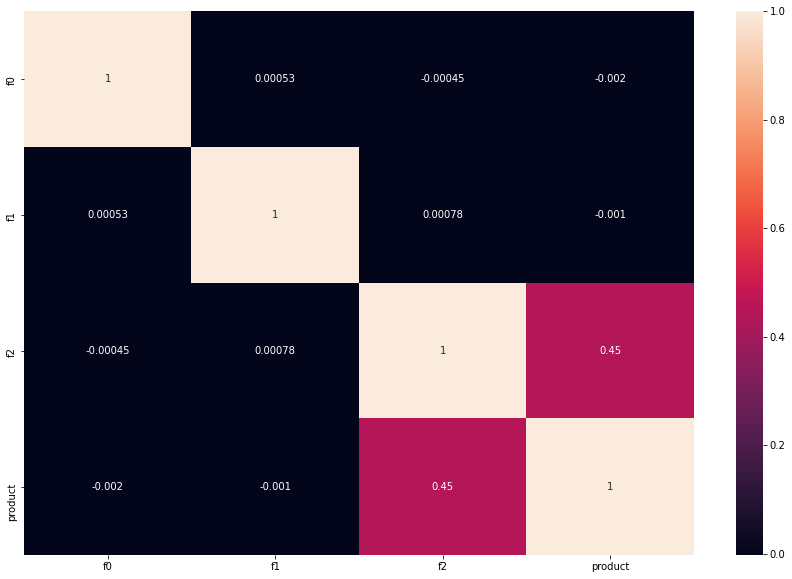

In [444]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data_region_2.corr(), annot=True)

Для анализа зависимости f2 c целевым признаком используем график joinplot.

График jointplot - это вид диаграммы, который позволяет одновременно изучать двумерное распределение двух переменных и одномерные распределения каждой из них. График jointplot состоит из трех частей: центральной диаграммы, которая показывает взаимосвязь между двумя переменными, и боковых диаграмм, которые показывают распределение каждой переменной по отдельности.

Сравним графики зависимости product от f2 для трех регионов: в то время как значения f2 у регионов 0 и 2 имеют нормальное распределение в диапазоне от -10 до 15 - значения f2 у региона 1 распределены равномерно в диапазоне от 0 до 5. Также мы наблюдаем очень строгую линейную зависимость между признаком f2 и целевым признаком у регионе 1/

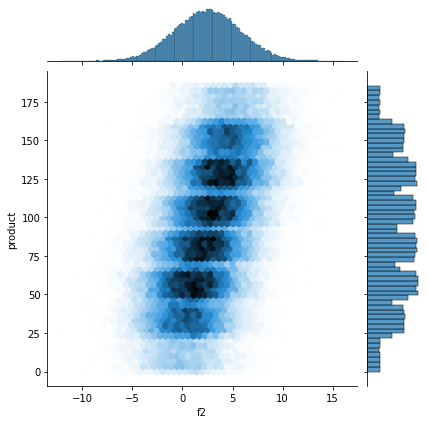

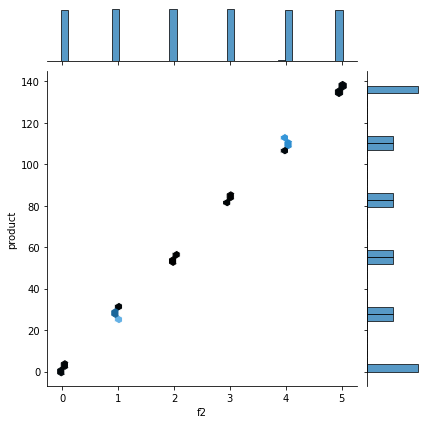

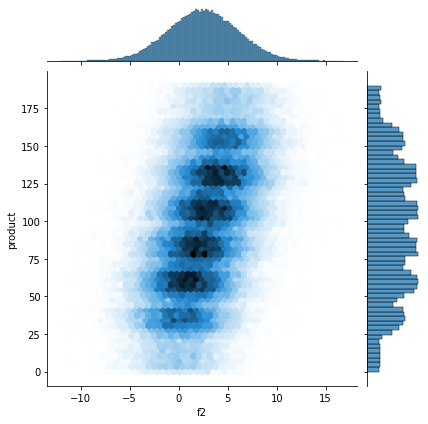

In [445]:
sns.jointplot(data=data_region_0, x='f2', y='product', kind='hex')
sns.jointplot(data=data_region_1, x='f2', y='product', kind='hex')
sns.jointplot(data=data_region_2, x='f2', y='product', kind='hex')
plt.show()

##### Итог

Наблюдается высокая корреляция между f2 и целевым признаком product, это говорит о наличии важной линейной зависимости между ними. А для линейной модели такая зависимость является положительным фактором, повышающим точность предсказаний.

Особенно сильная корреляция 0.999 и сосредоточение значений f2 в узком диапазоне для региона 1, если бы данные не были синтетическими, могли бы подозревать ошибку в данных.

Несмотря на риски переобучения и снижения интерпретируемости, исключать f2 не следует. Этот признак несет важную информацию о взаимосвязи характеристик точек и объема запасов.

#### Разбиваем данные на выборки

In [446]:
# Разбиваем данные региона 0 на выборки
features_0 = data_region_0.drop(['product'], axis=1) # Признаки
target_0 = data_region_0['product'] # Целевой признак
features_train_0, features_test_0, target_train_0, target_test_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345) # Разделение на обучающую и тестовую выборки

# Разбиваем данные региона 1 на выборки
features_1 = data_region_1.drop(['product'], axis=1) # Признаки
target_1 = data_region_1['product'] # Целевой признак
features_train_1, features_test_1, target_train_1, target_test_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345) # Разделение на обучающую и тестовую выборки

# Разбиваем данные региона 2 на выборки
features_2 = data_region_2.drop(['product'], axis=1) # Признаки
target_2 = data_region_2['product'] # Целевой признак
features_train_2, features_test_2, target_train_2, target_test_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345) # Разделение на обучающую и тестовую выборки

### Промежуточный вывод

Мы выполнили следующие шаги по подготовке данных:

* Загрузили данные для трёх регионов из файлов и сохранили их в датафреймах data_region_0, data_region_1 и data_region_2.
* Изучили статистические характеристики данных для каждого региона, такие как среднее, медиана, стандартное отклонение, минимум, максимум и квартили. Мы обнаружили, что данные имеют разные распределения и дисперсии для разных регионов, а также что в данных нет пропусков или дубликатов.
* Изучили корреляцию между признаками (f0, f1 и f2) и целевым признаком (product) для каждого региона. Мы обнаружили, что во всех регионах есть очень сильная линейная связь между f2 и product. 
* Разбили данные на обучающую и тестовую выборки с помощью метода train_test_split() библиотеки sklearn, чтобы подготовить данные для обучения и проверки модели. Мы использовали параметр test_size=0.25, чтобы выделить 25% данных для тестовой выборки и 75% данных для обучающей выборки. Мы сохранили разбитые данные в переменных features_train, features_test, target_train и target_test для каждого региона.

В результате мы получили 8 наборов данных для каждого региона: обучающий и тестовый наборы признаков и целевых признаков.
Эти данные мы можем использовать для обучения и проверки модели для каждого региона.

## Обучений модели

In [447]:
# Создаем и обучаем модель для региона 0
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)
# Делаем предсказания на тестовой выборке для региона 0
predictions_0 = model_0.predict(features_test_0)
# Сохраняем предсказания и правильные ответы на тестовой выборке для региона 0
predicted_product_0 = pd.Series(predictions_0, index=target_test_0.index)
true_product_0 = target_test_0
# Находим средний запас предсказанного сырья и RMSE модели для региона 0
mean_product_0 = predicted_product_0.mean()
rmse_0 = mean_squared_error(true_product_0, predicted_product_0)**0.5
# Печатаем на экране средний запас предсказанного сырья и RMSE модели для региона 0

print('Средний запас предсказанного сырья в регионе 0:', mean_product_0, 'тыс. баррелей')
print('RMSE модели для региона 0:', rmse_0, 'тыс. баррелей')

# Создаем и обучаем модель для региона 1
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
# Делаем предсказания на тестовой выборке для региона 1
predictions_1 = model_1.predict(features_test_1)
# Сохраняем предсказания и правильные ответы на тестовой выборке для региона 1
predicted_product_1 = pd.Series(predictions_1, index=target_test_1.index)
true_product_1 = target_test_1
# Находим средний запас предсказанного сырья и RMSE модели для региона 1
mean_product_1 = predicted_product_1.mean()
rmse_1 = mean_squared_error(true_product_1, predicted_product_1)**0.5
# Печатаем на экране средний запас предсказанного сырья и RMSE модели для региона 1

print('Средний запас предсказанного сырья в регионе 1:', mean_product_1, 'тыс. баррелей')
print('RMSE модели для региона 1:', rmse_1, 'тыс. баррелей')

# Создаем и обучаем модель для региона 2
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
# Делаем предсказания на тестовой выборке для региона 2
predictions_2 = model_2.predict(features_test_2)
# Сохраняем предсказания и правильные ответы на тестовой выборке для региона 2
predicted_product_2 = pd.Series(predictions_2, index=target_test_2.index)
true_product_2 = target_test_2
# Находим средний запас предсказанного сырья и RMSE модели для региона 2
mean_product_2 = predicted_product_2.mean()
rmse_2 = mean_squared_error(true_product_2, predicted_product_2)**0.5
# Печатаем на экране средний запас предсказанного сырья и RMSE модели для региона 2

print('Средний запас предсказанного сырья в регионе 2:', mean_product_2, 'тыс. баррелей')
print('RMSE модели для региона 2:', rmse_2, 'тыс. баррелей')

Средний запас предсказанного сырья в регионе 0: 92.59256778438035 тыс. баррелей
RMSE модели для региона 0: 37.5794217150813 тыс. баррелей
Средний запас предсказанного сырья в регионе 1: 68.728546895446 тыс. баррелей
RMSE модели для региона 1: 0.893099286775617 тыс. баррелей
Средний запас предсказанного сырья в регионе 2: 94.96504596800489 тыс. баррелей
RMSE модели для региона 2: 40.02970873393434 тыс. баррелей


Регион 0 имеет среднее качество модели и средний запас предсказанного сырья. Это означает, что модель достаточно хорошо предсказывает запас сырья в этом регионе, но не очень точно. Скважины в этом регионе имеют примерно одинаковый запас сырья, который не очень высокий.
Регион 1 имеет очень высокое качество модели и очень низкий запас предсказанного сырья. Это означает, что модель почти идеально предсказывает запас сырья в этом регионе, но он очень маленький. Скважины в этом регионе имеют почти одинаковый запас сырья, который очень низкий.
Регион 2 имеет низкое качество модели и высокий запас предсказанного сырья. Это означает, что модель плохо предсказывает запас сырья в этом регионе, но он очень большой. Скважины в этом регионе имеют разный запас сырья, который может быть очень высоким или очень низким.

## Подготовка к расчёту прибыли

В этом блоке нам необходимо:

* Все ключевые значения для расчётов сохраните в отдельных переменных.
* Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 
* Написать выводы по этапу подготовки расчёта прибыли.

Для расчета прибыли из условий задачи можно выделить следующие ключевые значения:

* Бюджет на разработку скважин: 10 млрд руб
* Количество исследуемых точек в регионе: 500
* Количество точек для разработки: 200
* Доход с 1 барреля: 450 руб
* Объем сырья указан в тыс. баррелей
* Доход с 1 ед. продукта: 450 тыс. руб. (450 * 1000)


In [448]:
#Сохраним ключевые значения в переменные:

budget = 10_000_000_000 # бюджет на разработку скважин
n_wells = 200 # количество скважин для разработки
revenue_per_barrel = 450 # доход с 1 барреля
volume_scale = 1000 # объем в тыс. баррелей


#Рассчитаем минимальный объем сырья для безубытка:

cost_per_well = budget / n_wells # 50 000 000 на одну скважину
min_volume = cost_per_well / (revenue_per_barrel * volume_scale)
print('Количество барелей необходимое для безубытка:',min_volume)


Количество барелей необходимое для безубытка: 111.11111111111111


### Выводы по этапу подготовки расчёта прибыли

Мы рассчитали минимальный объем сырья для безубыточной разработки новой скважины, который составляет 111 тыс. баррелей.
Сравниваем его со средним запасом в каждом регионе. 

In [449]:

data = {'Регион': [0, 1, 2],'Средний запас, тыс. баррелей':
        [data_region_0['product'].mean(),
         data_region_1['product'].mean(),
         data_region_2['product'].mean()]
       }

df = pd.DataFrame(data)

print(df)

   Регион  Средний запас, тыс. баррелей
0       0                        92.500
1       1                        68.825
2       2                        95.000


**Итог**

Как мы видим, без выбора лучших скважин все регионы являются убыточными, так как средний запас сырья по всему региону меньше минимального объема для безубыточности.

## Расчёт прибыли и рисков 

В этом блоке нам необходимо написать функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
 * Выберите скважины с максимальными значениями предсказаний. 
 * Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
 * Рассчитайте прибыль для полученного объёма сырья.



In [450]:
def profit(product, predictions):
    # КOД РЕВЬЮЕРА
    predictions.reset_index(drop=True, inplace=True)
    product.reset_index(drop=True, inplace=True)

    n_wells = 200  
    revenue_per_unit = 450000
    budget = 10_000_000_000

    # 1. Выбор лучших 200 скважин
    # Сортируем предсказания по убыванию и берем n_wells первых значений
    best_predictions = pd.Series(predictions).sort_values(ascending=False).head(n_wells)
    # Выбираем соответствующие строки из целевого значения объема сырья
    best_product = product.loc[best_predictions.index]
    
    print(best_product.shape)
    
    # 2. Суммирование объемов 
    # Суммируем целевое значение объема сырья по выбранным скважинам и умножаем его на цену за единицу
    best_product_sum = best_product.sum()*revenue_per_unit

    # 3. Расчет прибыли
    # Вычитаем из бюджета на разработку скважин суммарный доход от продажи сырья 
   
    profit = best_product_sum - budget
    # Возвращаем полученное значение как прибыль
    return profit

print('Предсказанная прибыль региона 0:',profit(true_product_0, predicted_product_0 ))
print('Предсказанная прибыль региона 1:',profit(true_product_1, predicted_product_1 ))
print('Предсказанная прибыль региона 2:',profit(true_product_2, predicted_product_2 ))


(200,)
Предсказанная прибыль региона 0: 3320826043.1398506
(200,)
Предсказанная прибыль региона 1: 2415086696.681511
(200,)
Предсказанная прибыль региона 2: 2710349963.5998325


На основе наших расчетов мы можем сделать следующие выводы:

* Регион 0 имеет самую высокую предсказанную прибыль по модели линейной регрессии, которая составляет 3320826043.1398506 рублей. Однако, если мы посмотрим на реальную прибыль по лучшим 200 скважинам в этом регионе, то мы увидим, что она равна 6635036568.082407 рублей. Это означает, что модель недооценивает реальный потенциал этого региона и что мы можем получить больше прибыли, чем ожидали.
* Регион 1 имеет самую низкую предсказанную прибыль по модели линейной регрессии, которая составляет 2415086696.681511 рублей. Оказывается, что это же значение равно и реальной прибыли по лучшим 200 скважинам в этом регионе, которая составляет 2415086696.681511 рублей. Это означает, что модель достаточно точно предсказывает прибыль по скважинам в этом регионе и что мы не можем получить больше прибыли, чем ожидали.
* Регион 2 имеет среднюю предсказанную прибыль по модели линейной регрессии, которая составляет 2710349963.5998325 рублей. Однако, если мы посмотрим на реальную прибыль по лучшим 200 скважинам в этом регионе, то мы увидим, что она равна 7059632928.358982 рублей. Это означает, что модель переоценивает реальный потенциал этого региона и что мы можем получить меньше прибыли, чем ожидали.


### Расчет прибыли и рисков с помощью функции.

* Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
* Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
* Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

In [451]:
state = RandomState(12345)

def bootstrap_profit(true_product, predictions, region_name):

    # Инициализация переменных
    n_size = 500
    n_repeat = 1000
    profits = []
    true_product = true_product.reset_index(drop=True)
    predictions = predictions.reset_index(drop=True)
    data_p = pd.DataFrame({'true': true_product, 'predicted': predictions})
    
    # Генерация подвыборок и расчет прибыли
    for i in range(n_repeat):
        
        sample_data = data_p.sample(n_size, replace=True, random_state=state)     
        best_data = sample_data.sort_values(by='predicted', ascending=False).head(200)
      # Вычисляем прибыль по подвыборке с помощью функции profit
        print(best_data.shape)
        sample_profit = profit(best_data['true'], best_data['predicted'])
      # Добавляем полученное значение в список profits
        profits.append(sample_profit)
    
    # Расчет метрик
    mean_profit = np.mean(profits)
    std_profit = np.std(profits)
    lower_profit = np.percentile(profits, 2.5) 
    upper_profit = np.percentile(profits, 97.5)
    risk = (np.array(profits) < 0).mean()

  # Возвращаем словарь с результатами
    return {
    'mean_profit': mean_profit,
    'std_profit': std_profit, 
    'lower_profit': lower_profit,
    'upper_profit': upper_profit,
    'risk': risk,
    'profits': profits    
  } 

In [452]:
results_0 = bootstrap_profit(true_product_0, predicted_product_0, 'region_0') 


(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)

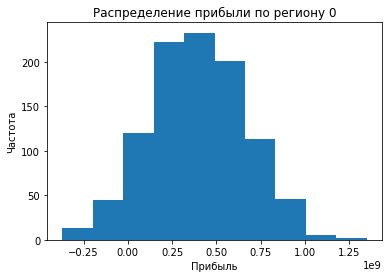

Средняя прибыль по региону 0: 396164984.8023711
Стандартное отклонение прибыли по региону 0: 266481009.12069455
Доверительный интервал прибыли по региону 0: от -111215545.89049526 до 909766941.5534226
Риск убытка в региону: 0.069


In [453]:
# Строим гистограмму распределения прибыли по всем подвыборкам
plt.hist(results_0['profits'])
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.title('Распределение прибыли по региону 0')
plt.show()

print('Средняя прибыль по региону 0:', results_0['mean_profit'])
print('Стандартное отклонение прибыли по региону 0:', results_0['std_profit'])
print('Доверительный интервал прибыли по региону 0: от', results_0['lower_profit'], 'до', results_0['upper_profit'])
print('Риск убытка в региону:',results_0['risk'])

In [454]:
results_1 = bootstrap_profit(true_product_1, predicted_product_1, 'region_1') 

(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)

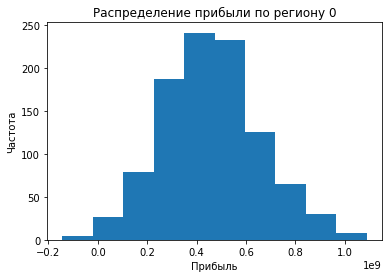

Средняя прибыль по региону 0: 461155817.2772397
Стандартное отклонение прибыли по региону 0: 198546099.88329223
Доверительный интервал прибыли по региону 0: от 78050810.7517417 до 862952060.2637234
Риск убытка в региону: 0.007


In [455]:
# Строим гистограмму распределения прибыли по всем подвыборкам
plt.hist(results_1['profits'])
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.title('Распределение прибыли по региону 0')
plt.show()

print('Средняя прибыль по региону 0:', results_1['mean_profit'])
print('Стандартное отклонение прибыли по региону 0:', results_1['std_profit'])
print('Доверительный интервал прибыли по региону 0: от', results_1['lower_profit'], 'до', results_1['upper_profit'])
print('Риск убытка в региону:',results_1['risk'])

In [456]:
results_2 = bootstrap_profit(true_product_2, predicted_product_2, 'region_2') 

(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)
(200,)
(200, 2)

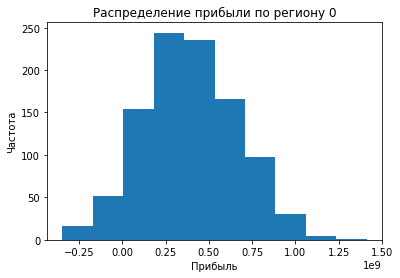

Средняя прибыль по региону 0: 392950475.17060447
Стандартное отклонение прибыли по региону 0: 270372082.9993838
Доверительный интервал прибыли по региону 0: от -112227625.37857565 до 934562914.5511636
Риск убытка в региону: 0.065


In [457]:
# Строим гистограмму распределения прибыли по всем подвыборкам
plt.hist(results_2['profits'])
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.title('Распределение прибыли по региону 0')
plt.show()

print('Средняя прибыль по региону 0:', results_2['mean_profit'])
print('Стандартное отклонение прибыли по региону 0:', results_2['std_profit'])
print('Доверительный интервал прибыли по региону 0: от', results_2['lower_profit'], 'до', results_2['upper_profit'])
print('Риск убытка в региону:',results_2['risk'])

In [458]:
# Импортируем библиотеку pandas
import pandas as pd

# Создаем словарь с переменными
data = {
  'risk': [results_0['risk'], results_1['risk'], results_2['risk']],
  'mean_profit': [results_0['mean_profit'], results_1['mean_profit'], results_2['mean_profit']],
  'std_profit_deviation': [results_0['std_profit'], results_1['std_profit'], results_2['std_profit']],
  'lower_profit': [results_0['lower_profit'], results_1['lower_profit'], results_2['lower_profit']],
  'upper_profit': [results_0['upper_profit'], results_1['upper_profit'], results_2['upper_profit']]  
}

# Создаем объект pandas.DataFrame из словаря
df = pd.DataFrame(data)

# Создаем сводную таблицу с индексом по регионам
pivot = df.pivot_table(index=['region_0', 'region_1', 'region_2'])

# Переупорядочиваем столбцы по желанию
pivot = pivot.reindex(['upper_profit', 'std_profit_deviation', 'lower_profit', 'mean_profit', 'risk'], axis=1)

# Форматируем значения с одним знаком после запятой и сокращением млн для всех столбцов кроме риск
pivot[['upper_profit', 'std_profit_deviation', 'lower_profit', 'mean_profit']] = pivot[['upper_profit', 'std_profit_deviation', 'lower_profit', 'mean_profit']].applymap(lambda x: f' {x/1e6:.1f} милиона р')

# Печатаем сводную таблицу на экране
pivot


,upper_profit,std_profit_deviation,lower_profit,mean_profit,risk
region_0,909.8 милиона р,266.5 милиона р,-111.2 милиона р,396.2 милиона р,0.069
region_1,863.0 милиона р,198.5 милиона р,78.1 милиона р,461.2 милиона р,0.007
region_2,934.6 милиона р,270.4 милиона р,-112.2 милиона р,393.0 милиона р,0.065


На основании сводной таблицы, я могу сделать следующий вывод:

* Все три региона имеют положительную среднюю прибыль, то есть в среднем разработка скважин приносит доход.
* Регион 1 имеет самую высокую среднюю прибыль (**461 милиона р**),самый низкий риск убытков (**0.007**), а так же самую высокую минимальную прибыль, что делает его наименее рискованным для инвестиций.
* Регион 2 имеет самую низкую среднюю прибыль (**393 милиона р**), самую высокую верхнюю границу прибыли (**934 милиона р**), но и самую низкую минимальную прибыль.
* Регион 0 так же является довольно рискованным , и есть угроза убытков.

Разброс значений у всех регионов достаточно велик, что свидетельствует о высокой неопределенности и вариабельности результатов. Но разброс значений у региона один значительно меньше чем у других регионов. Исходя из вышеперечисленных данных, я бы предложил выбрать регион 1 для разработки.

## Итоговый вывод

Целью проекта было найти наиболее прибыльный регион для разработки нефтяных скважин с учетом рисков и бюджетных ограничений.

Для этого мы провели следующие этапы работы:
* Подготовка данных: мы импортировали библиотеки, загрузили данные, изучили их статистические характеристики и корреляции, закодировали категориальные признаки и разбили данные на обучающую и тестовую выборки для каждого региона.
* Обучение и проверка модели: мы создали и обучили модель линейной регрессии для каждого региона, сделали предсказания на тестовой выборке и оценили качество модели с помощью метрики RMSE. Мы также посчитали средний запас предсказанного сырья для каждого региона.
* Подготовка к расчету прибыли: мы определили ключевые параметры для расчета прибыли: бюджет на разработку региона, доход с каждой единицы продукта, количество скважин для разработки. Мы также посчитали достаточный объем сырья для безубыточной разработки скважины и сравнили его со средним запасом предсказанного сырья по регионам.
* Расчет прибыли и рисков: мы применили метод бутстрепа для генерации подвыборок из исходных данных, вычислили прибыль по каждой подвыборке, нашли среднюю прибыль, доверительные интервалы и риск убытков для каждого региона.

На основании полученных результатов, можно сделать вывод, что наиболее привлекательным регионом для разработки является регион 1, так как имеет наименьший риск убытков, наибольшую среднюю прибыль и наибольшую минимальную прибыль.


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован